In [1]:
#libraries used to extract, clean and manipulate the data
from script import *
import pandas as pd
import numpy as np
import string

#plotting graph libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#library used to count the frequency of words/vectorizer 
from sklearn.feature_extraction.text import CountVectorizer

#the sentiment analysis model, tokenization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilym/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/emilym/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emilym/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/emilym/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/Users/emilym/miniconda3/lib/python3.9/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [2]:
#include here the access token from the Genius API and plug in artist info and how many songs you want to include 

access_token = "TGUr3aObdouFxwzqfHleJ5mveXWoXxgn47uLTfjvChBnrWCFADH76D6JxsRh1LAx"
df0 = search_data('Coldplay',10,access_token)

Searching for songs by Coldplay...

Song 1: "The Scientist"
Song 2: "Viva la Vida"
Song 3: "Fix You"
Song 4: "Yellow"
Song 5: "Hymn for the Weekend"
Song 6: "A Sky Full of Stars"
Song 7: "Everglow"
Song 8: "Adventure of a Lifetime"
Song 9: "Paradise"
Song 10: "Clocks"

Reached user-specified song limit (10).
Done. Found 10 songs.


In [3]:
#cleaning and transforming the data using functions created in the script.py file
df = clean_lyrics(df0,'lyric')
#filter data to use songs that have lyrics
df = df[df['lyric'].notnull()]
#Save the data into a csv file
df.to_csv('lyrics.csv',index=False)
df.head(10)

/Users/emilym/Desktop/moodclassifier/poem-sentiment/script.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(r"verse |[1|2|3]|chorus|bridge|outro", "").str.replace("[", "").str.replace("]",
/Users/emilym/Desktop/moodclassifier/poem-sentiment/script.py:55: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace(r"verse |[1|2|3]|chorus|bridge|outro", "").str.replace("[", "").str.replace("]",
/Users/emilym/Desktop/moodclassifier/poem-sentiment/script.py:57: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.lower().str.replace(r"instrumental|intro|guitar|solo", "")
/Users/emilym/Desktop/moodclassifier/poem-sentiment/script.py:58: FutureWarning: The 

,artist,title,lyric
0,Coldplay,The Scientist,come up to meet you tell you i'm sorry you don...
1,Coldplay,Viva la Vida,chris martin i used to rule the world seas wou...
2,Coldplay,Fix You,chris martin when you try your best but you do...
3,Coldplay,Yellow,chris martin look at the stars look how they s...
4,Coldplay,Hymn for the Weekend,beyoncé and said drink from me drink from me o...
5,Coldplay,A Sky Full of Stars,'cause you're a sky 'cause you're a sky full o...
6,Coldplay,Everglow,oh they say people come say people go this par...
7,Coldplay,Adventure of a Lifetime,indecipherable turn your magic on umi she'd s...
8,Coldplay,Paradise,oohoohooh oohoohooh oohoohooh oohoohooh oohooh...
9,Coldplay,Clocks,the lights go out and i can't be saved tides t...


In [4]:
#here is where we create the word list to use for sentiment analysis 

def unique(list1):
   # initialize a null list
     unique_list = []
   # traverse for all elements
     for x in list1:
         # check if exists in unique_list or not, if not append to it
         if x not in unique_list:
              unique_list.append(x)
         #return the unique_list 
     return unique_list

# this stores the unique words of each lyrics into a new column called words

words = []
#iterate through each lyric and split unique words, appending the result into the words list
df = df.reset_index(drop=True)
for word in df['lyric'].tolist():
    words.append(unique(lyrics_to_words(word).split()))
#create the new column with the information of words lists
df['words'] = words
df.head()

,artist,title,lyric,words
0,Coldplay,The Scientist,come up to meet you tell you i'm sorry you don...,"[come, meet, tell, im, sorry, know, lovely, fi..."
1,Coldplay,Viva la Vida,chris martin i used to rule the world seas wou...,"[chris, martin, used, rule, world, sea, would,..."
2,Coldplay,Fix You,chris martin when you try your best but you do...,"[chris, martin, try, best, succeed, get, want,..."
3,Coldplay,Yellow,chris martin look at the stars look how they s...,"[chris, martin, look, star, shine, everything,..."
4,Coldplay,Hymn for the Weekend,beyoncé and said drink from me drink from me o...,"[beyoncé, said, drink, ohahohah, shoot, across..."


In [5]:
#Create a new dataframe of all the  words used in lyrics
set_words = []
#Iterate through each word store them into new lists
for i in df.index:
   for word in df['words'].iloc[i]:
    set_words.append(word)
    #set_year.append(df['year'].iloc[i])
#create the new data frame with the information of words
words_df = pd.DataFrame({'words':set_words})
# here i am defining stopwords in case the clean data function does not remove all of them
stop_words = ['chris','martin','beyonce']
# count the frequency of each word that isn't in the stop words
cv = CountVectorizer(stop_words=stop_words)
#Create a dataframe called data_cv to store the the number of times the word was used in a lyric
text_cv = cv.fit_transform(words_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
#data_cv['year'] = words_df['year']
#here i created a dataframe that Sums the ocurrence frequency of each word
vect_words = data_cv.sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')
#Save the data into a csv file
vect_words.to_csv('words.csv',index=False)
vect_words = vect_words[['words']]
vect_words

/Users/emilym/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,words
0,aah
1,across
2,adventure
3,ahooh
4,alive
...,...
398,wrote
399,yeah
400,yellow
401,you44embedshare


In [7]:
#create lists to store the different scores for each word
#compound score shows the combination of pos/neg score, with the closer to +1 being a generally positive score,
#and -1 meaning generally more negative.

negative = []
neutral = []
positive = []
compound = []
#here we initialize the model
sid = SentimentIntensityAnalyzer()
#iterate for each row of lyrics and append the scores
for i in df.index:
    scores = sid.polarity_scores(df['lyric'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
#create 4 columns to the main data frame  for each score
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound
df.head(10)

,artist,title,lyric,words,negative,neutral,positive,compound
0,Coldplay,The Scientist,come up to meet you tell you i'm sorry you don...,"[come, meet, tell, im, sorry, know, lovely, fi...",0.100,0.810,0.090,0.2330
1,Coldplay,Viva la Vida,chris martin i used to rule the world seas wou...,"[chris, martin, used, rule, world, sea, would,...",0.037,0.941,0.022,-0.6061
2,Coldplay,Fix You,chris martin when you try your best but you do...,"[chris, martin, try, best, succeed, get, want,...",0.154,0.690,0.156,0.5583
3,Coldplay,Yellow,chris martin look at the stars look how they s...,"[chris, martin, look, star, shine, everything,...",0.000,0.887,0.113,0.9766
4,Coldplay,Hymn for the Weekend,beyoncé and said drink from me drink from me o...,"[beyoncé, said, drink, ohahohah, shoot, across...",0.169,0.802,0.029,-0.9925
5,Coldplay,A Sky Full of Stars,'cause you're a sky 'cause you're a sky full o...,"[cause, sky, full, star, im, gonna, give, hear...",0.088,0.823,0.089,0.0485
6,Coldplay,Everglow,oh they say people come say people go this par...,"[oh, say, people, come, go, particular, diamon...",0.031,0.852,0.117,0.9538
7,Coldplay,Adventure of a Lifetime,indecipherable turn your magic on umi she'd s...,"[indecipherable, turn, magic, umi, shed, say, ...",0.067,0.648,0.285,0.9957
8,Coldplay,Paradise,oohoohooh oohoohooh oohoohooh oohoohooh oohooh...,"[oohoohooh, girl, expected, world, flew, away,...",0.028,0.937,0.034,-0.4116
9,Coldplay,Clocks,the lights go out and i can't be saved tides t...,"[light, go, cant, saved, tide, tried, swim, br...",0.072,0.892,0.036,-0.7096


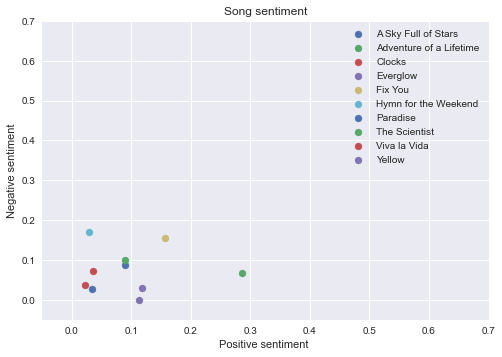

In [19]:
for name, group in df.groupby('title'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])

plt.title("Song sentiment")
plt.xlabel('Positive sentiment ')
plt.ylabel('Negative sentiment')
plt.show()

<AxesSubplot:xlabel='compound', ylabel='title'>

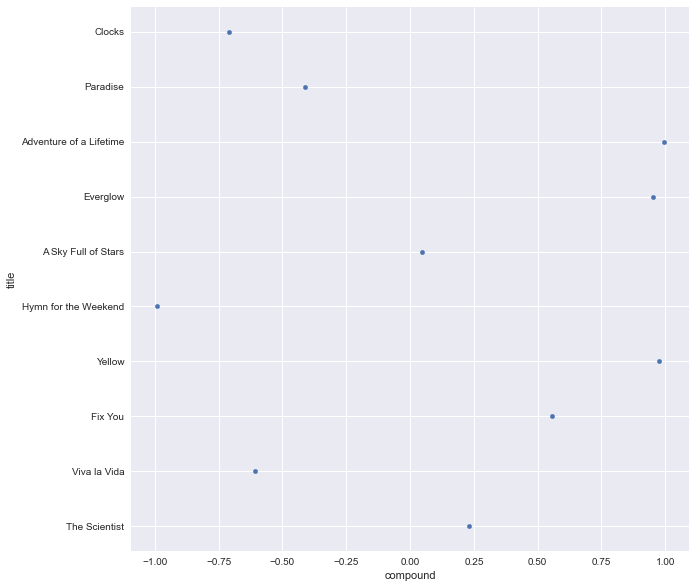

In [14]:
df.plot.scatter(x='compound', y='title', colormap="viridis", figsize=[10,10])